Import Libraries

In [152]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.filters import gaussian, threshold_otsu, threshold_multiotsu
from skimage.morphology import remove_small_objects, disk, binary_closing
from scipy.ndimage import zoom, binary_dilation
from skimage.measure import label, regionprops
from skimage import io, exposure, color
from skimage import measure
from skimage import exposure
from czifile import imread
from cellpose import models, plot 

Define Sub Functions

In [153]:
def display_image(image, path, type):
    """Display the image."""
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{path} {type}")
    plt.show()

def extract_image_paths(folder):
    """Extract all image file paths from the specified folder."""
    return [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

def read_image(image_path):
    """Read the LSM image from the specified path."""
    return imread(image_path)

def extract_channels(image):
    """Extract green and red channels from the squeezed image (shape: [Z, C, H, W]).""" 
    return image[0], image[1]
    
def otsu_threshold(image):
    """Apply Otsu's thresholding to the image."""
    thresh = threshold_otsu(image)
    binary = image > thresh
    return binary


Main Function

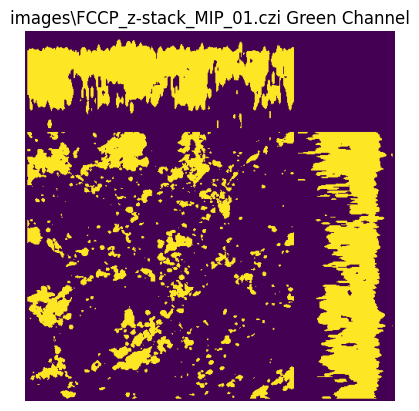

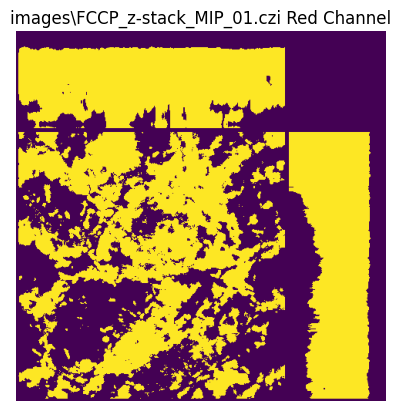

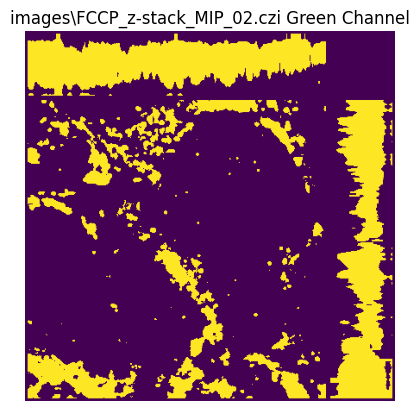

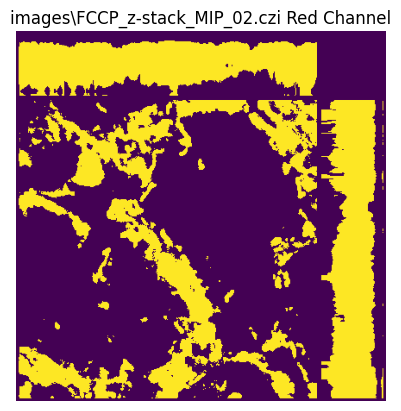

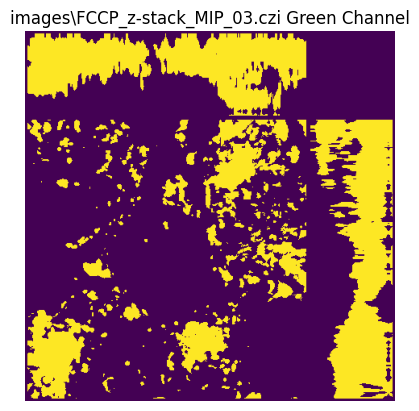

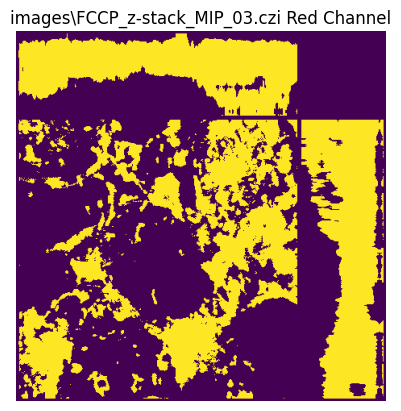

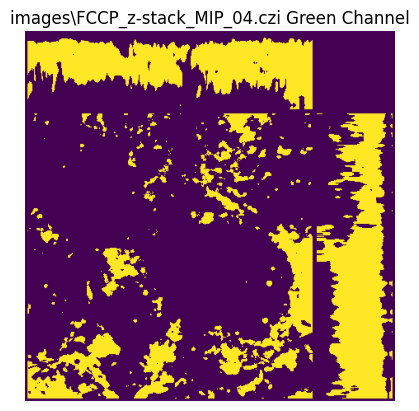

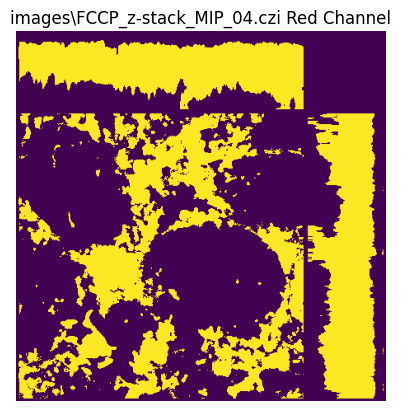

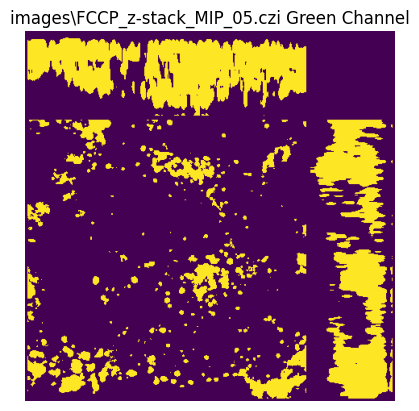

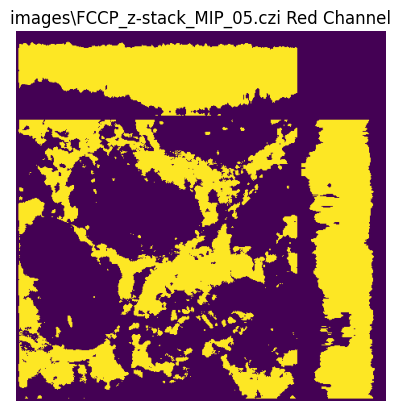

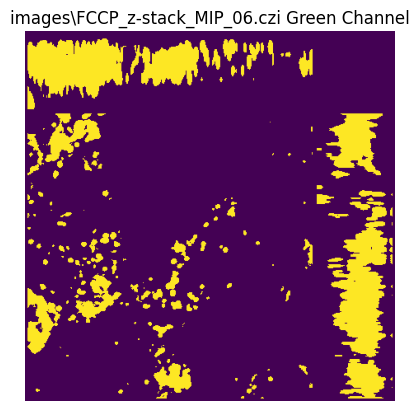

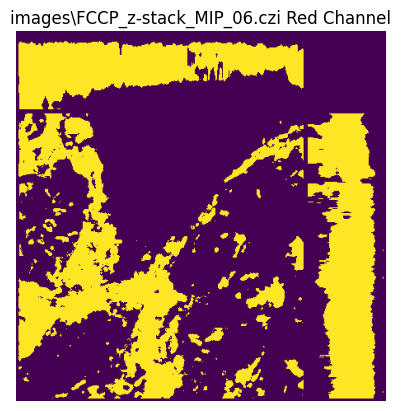

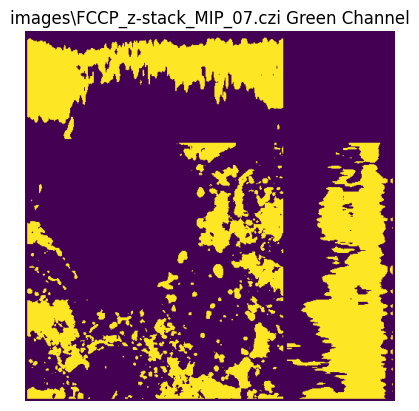

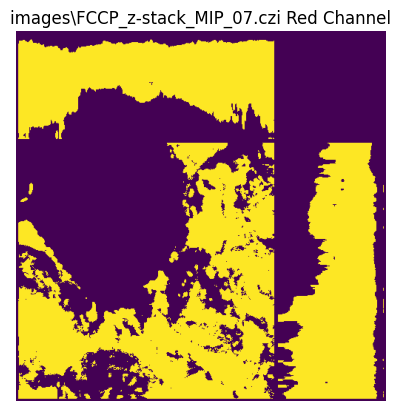

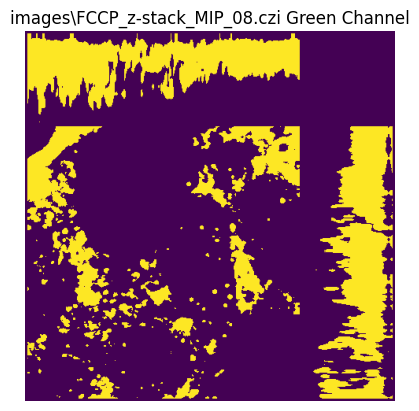

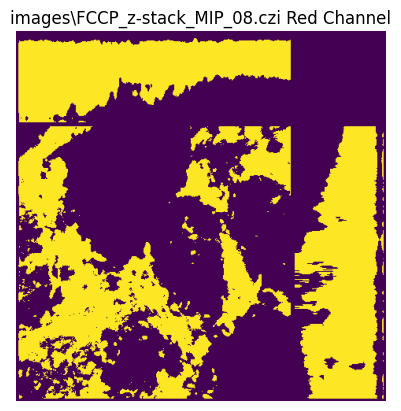

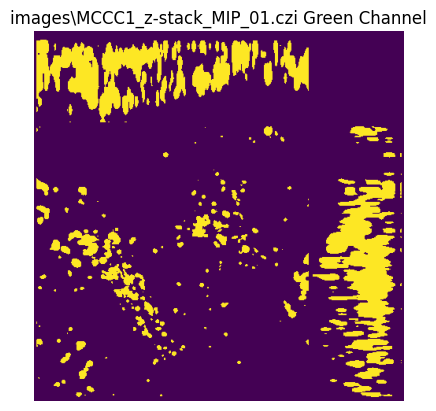

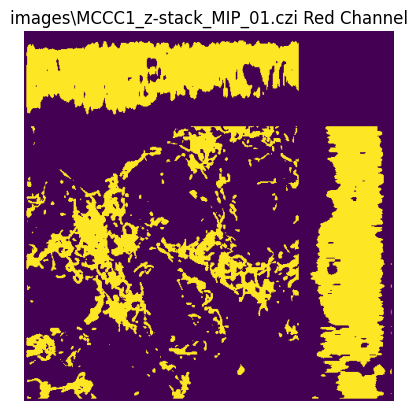

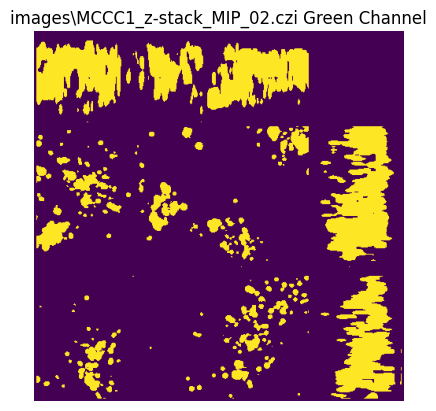

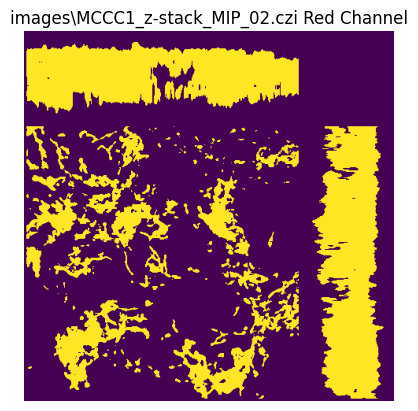

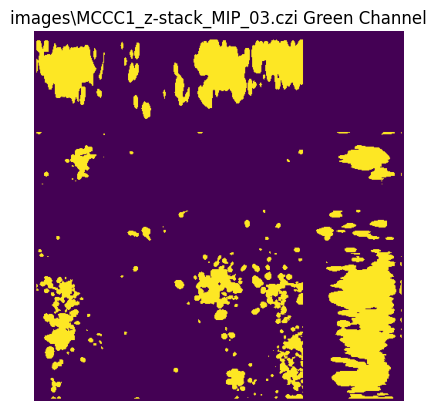

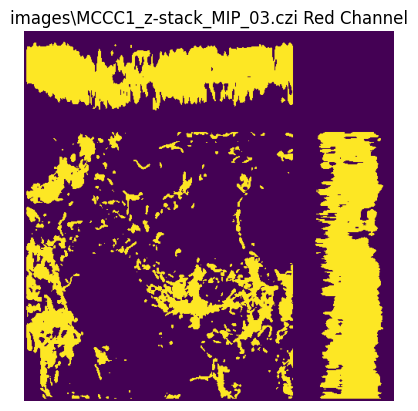

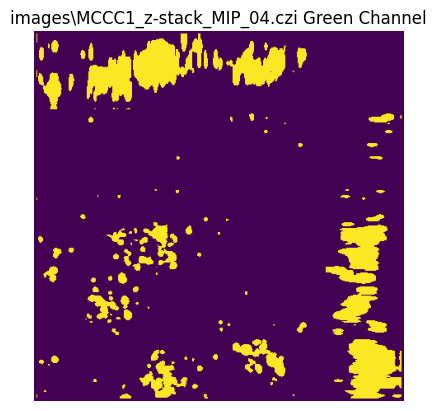

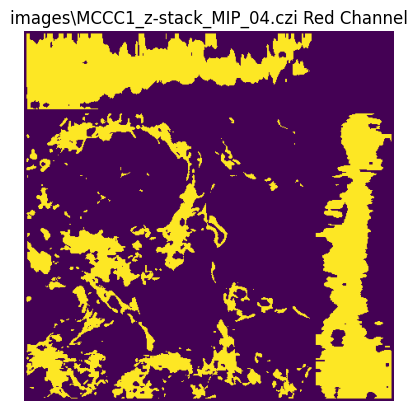

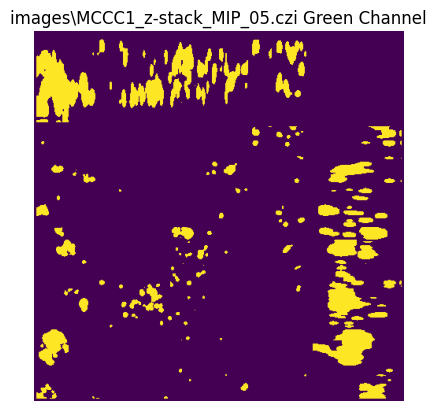

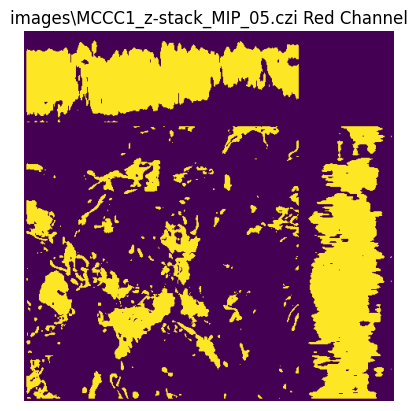

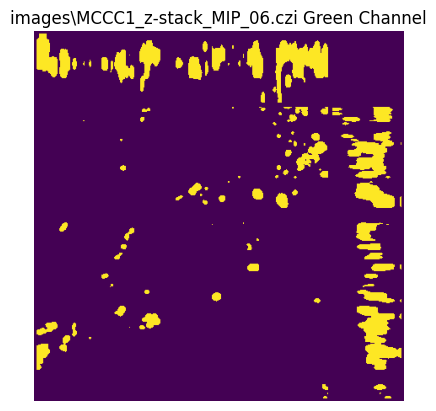

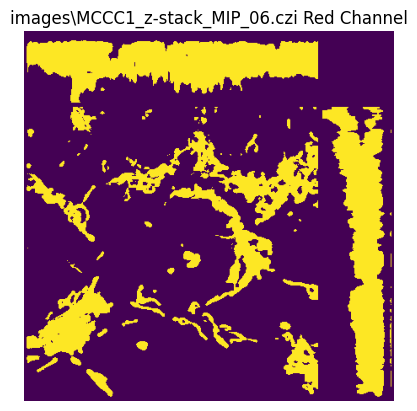

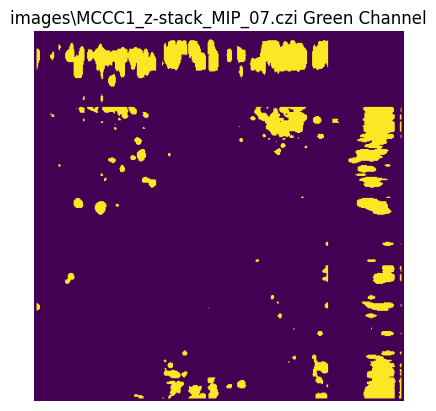

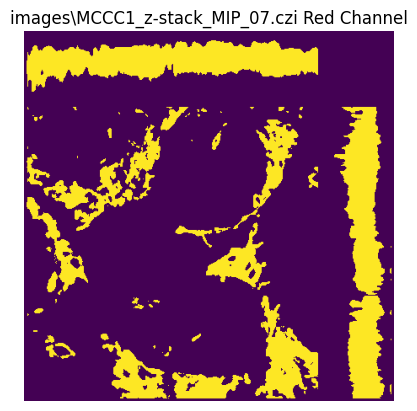

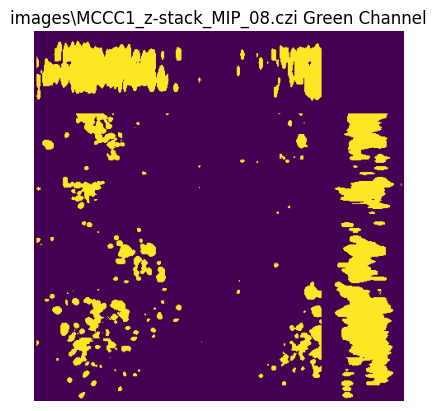

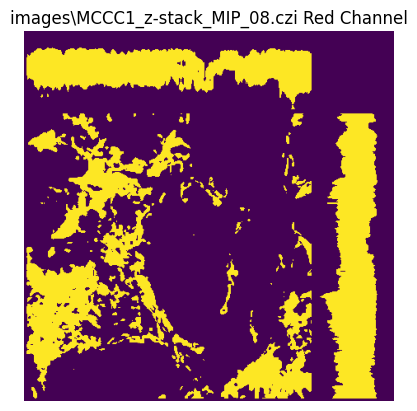

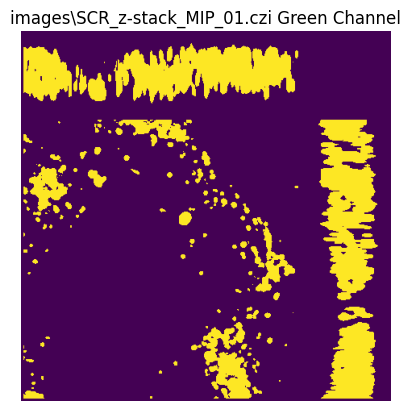

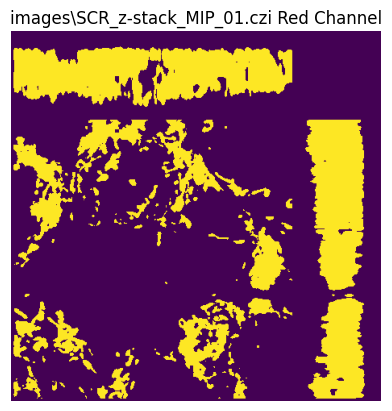

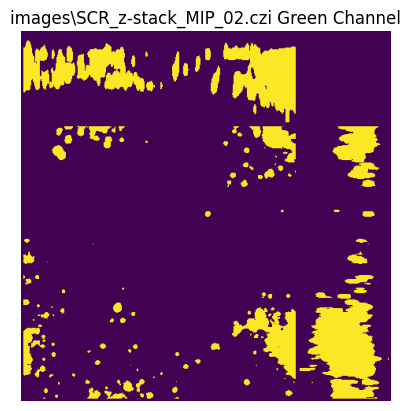

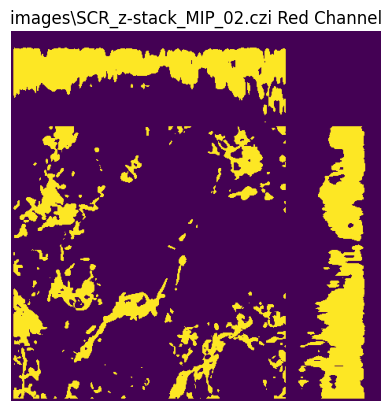

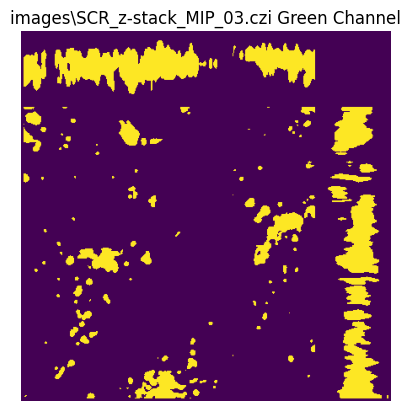

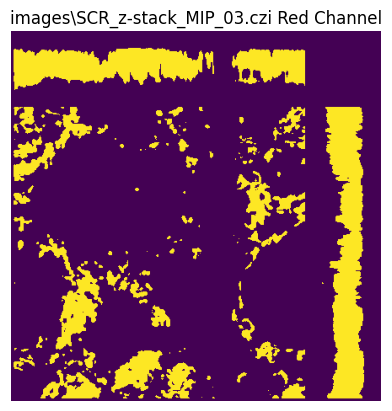

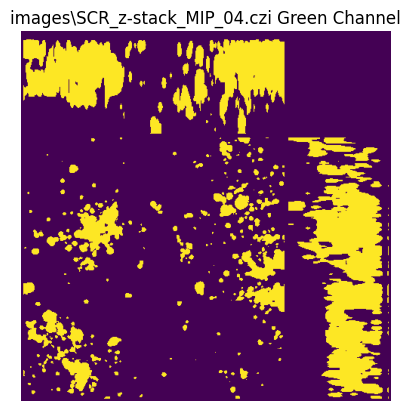

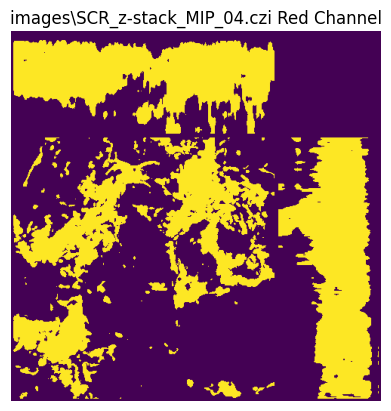

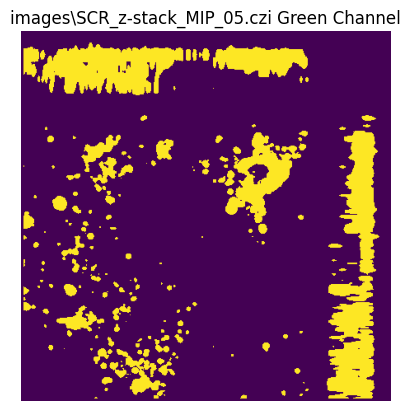

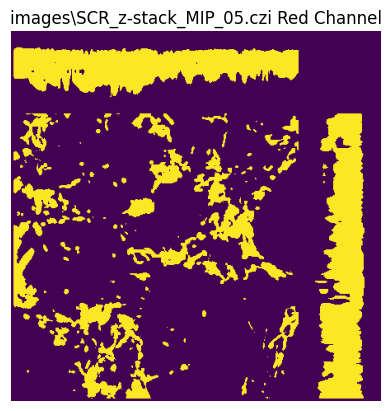

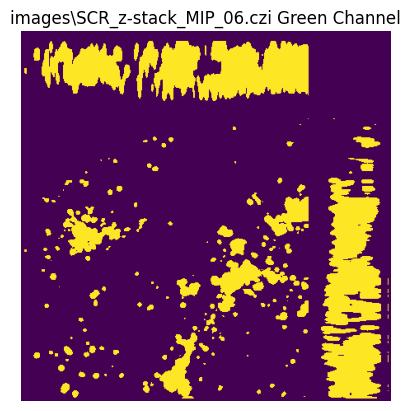

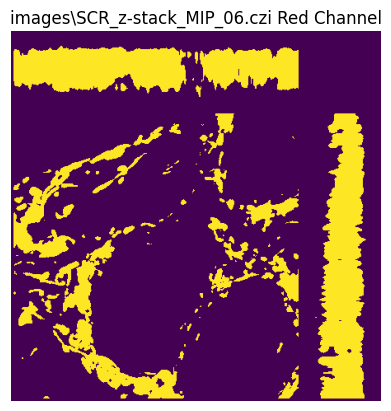

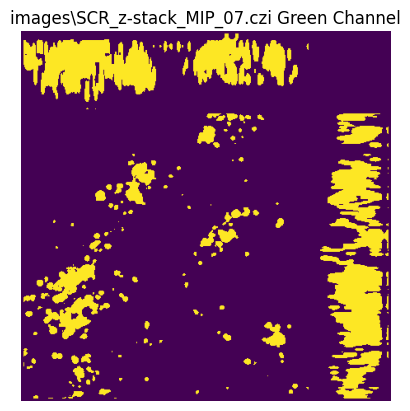

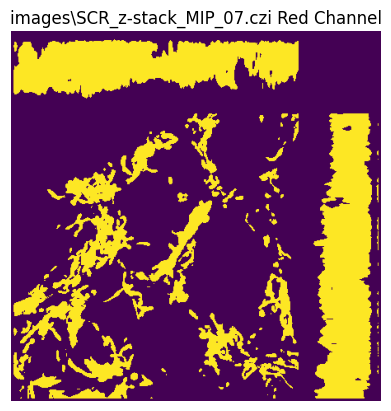

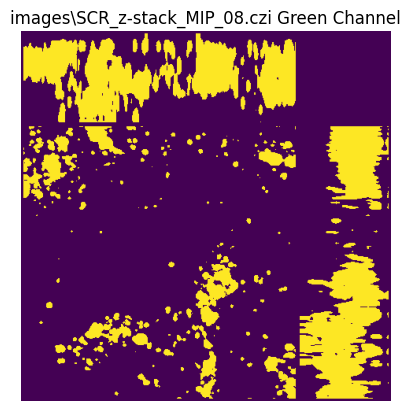

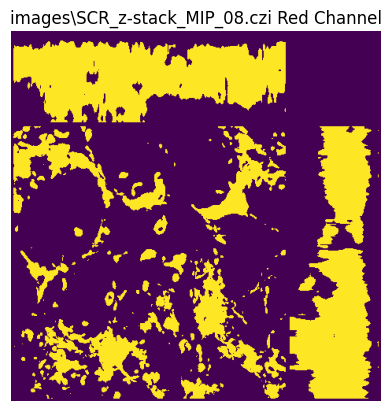

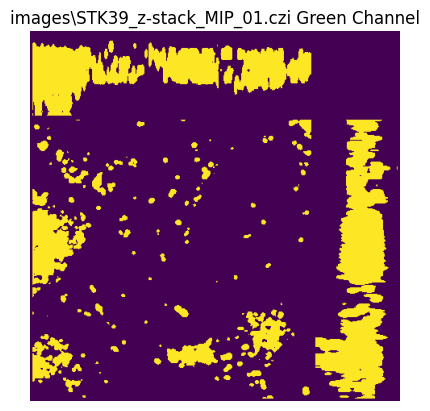

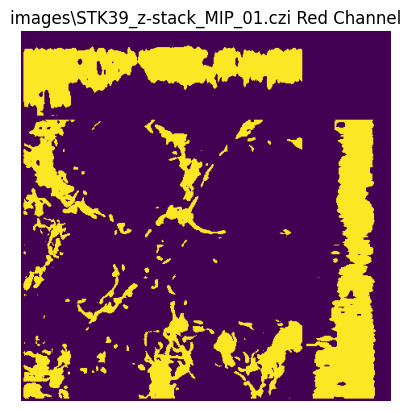

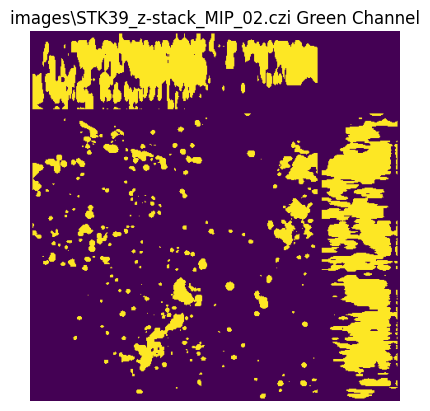

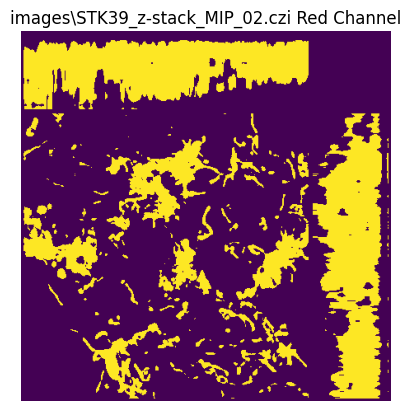

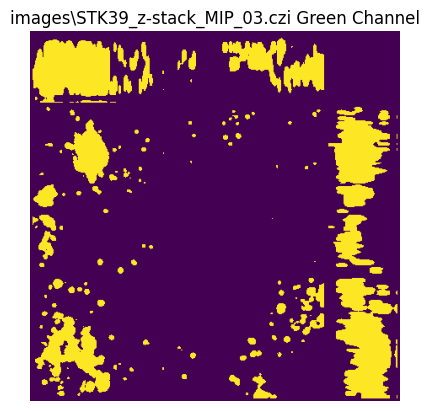

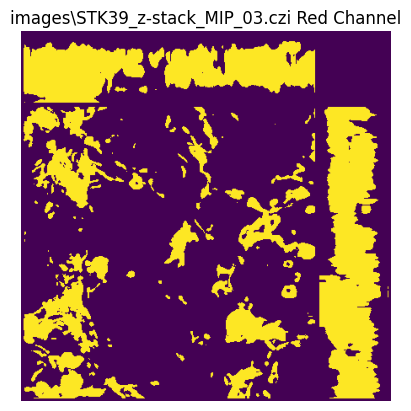

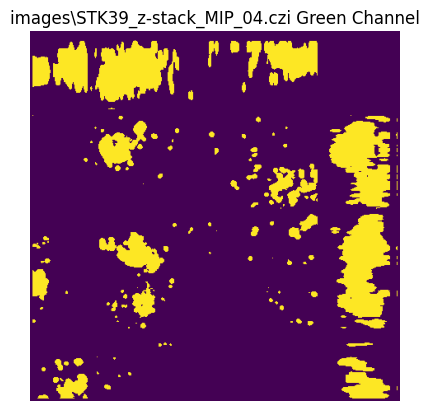

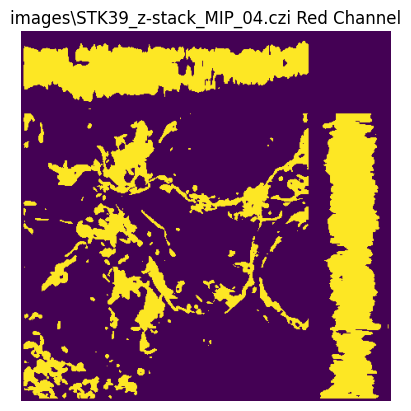

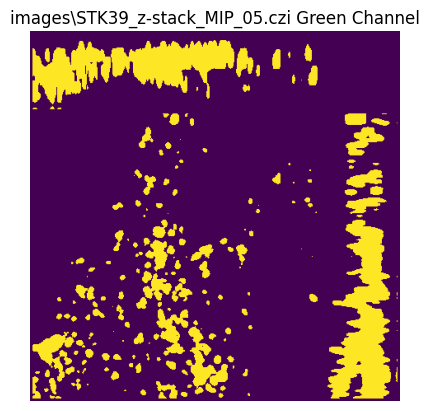

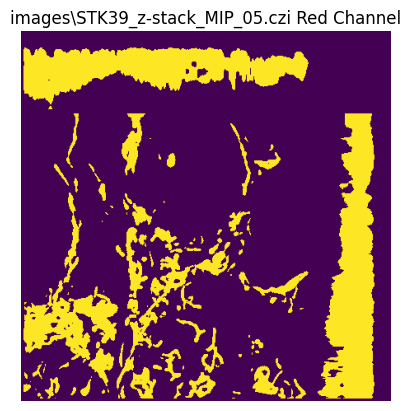

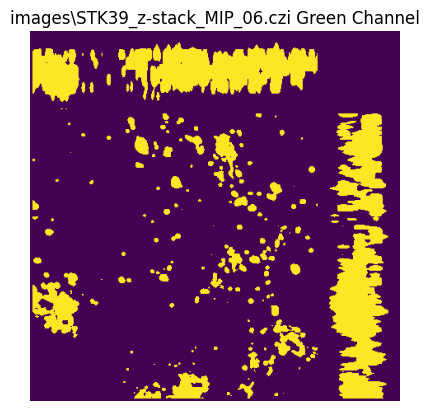

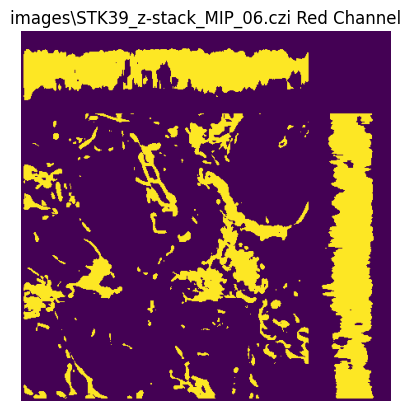

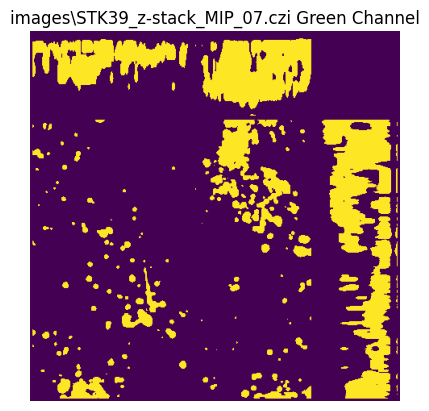

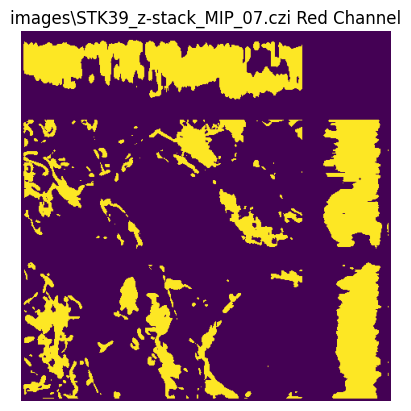

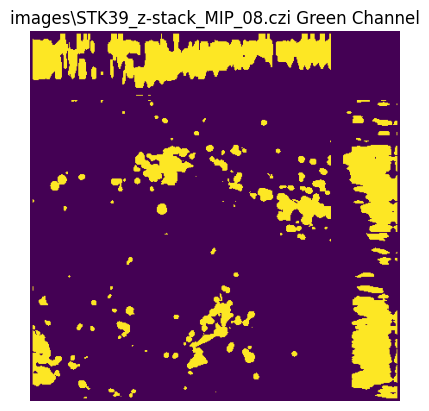

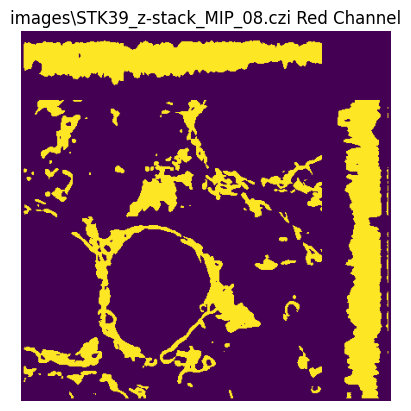

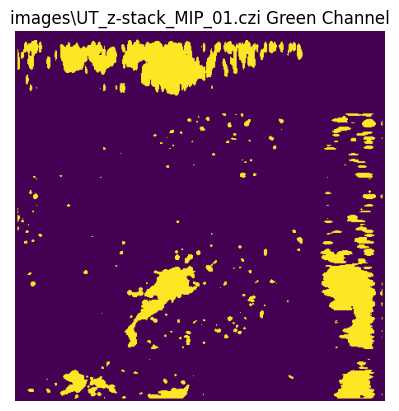

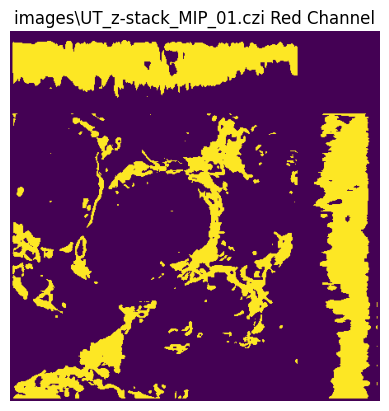

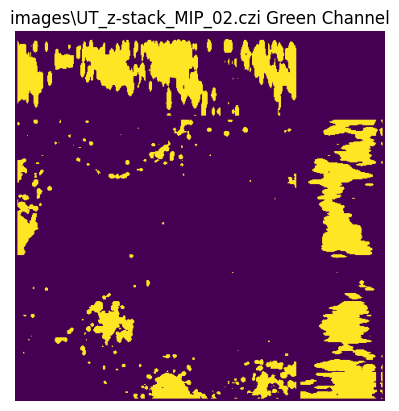

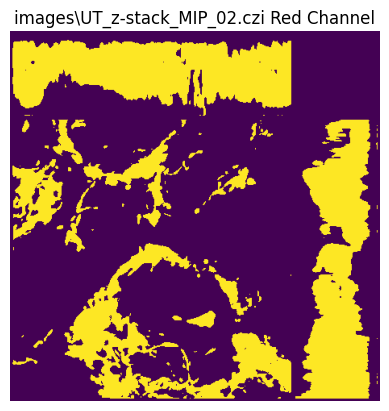

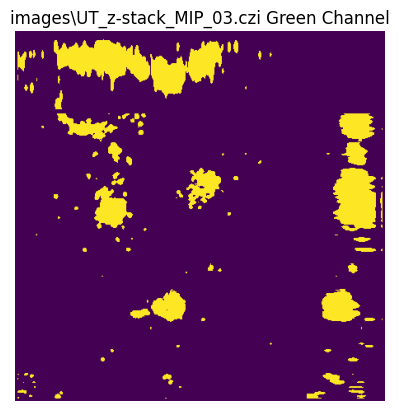

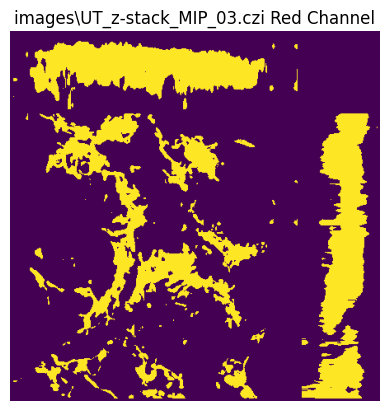

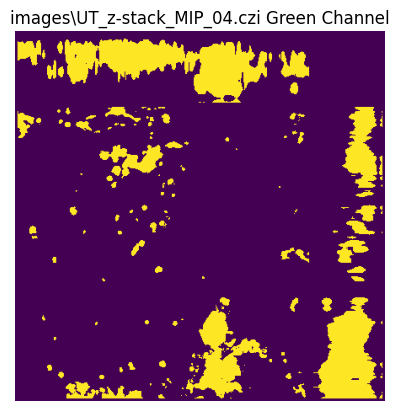

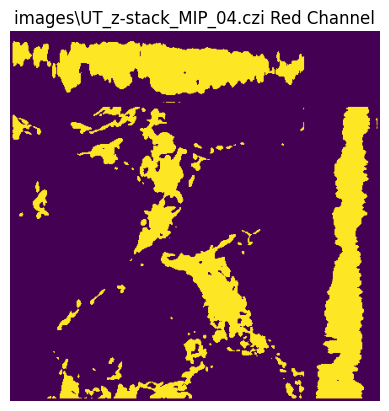

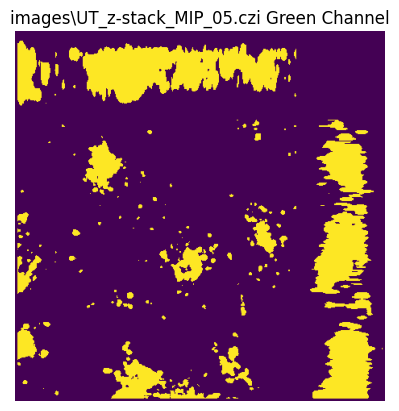

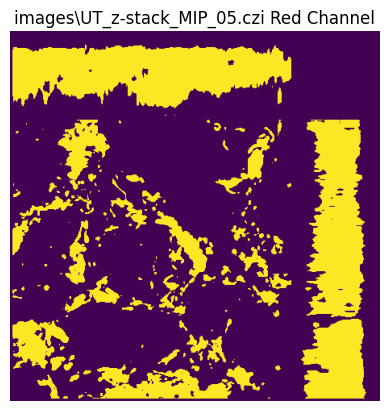

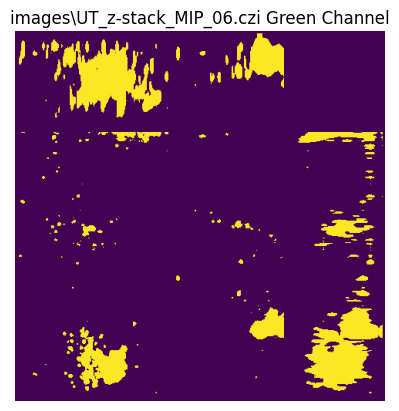

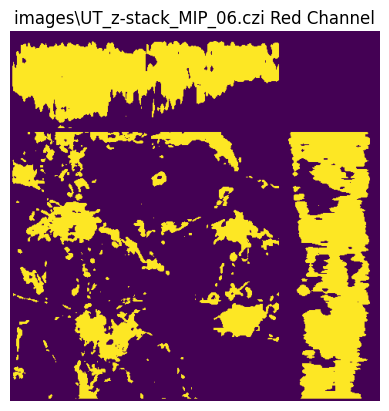

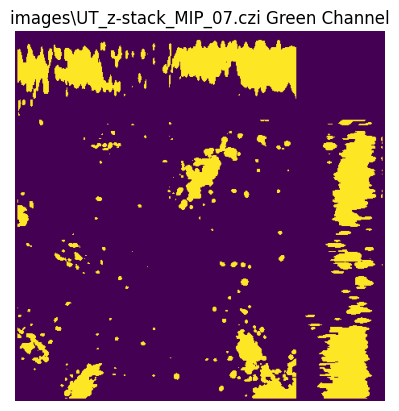

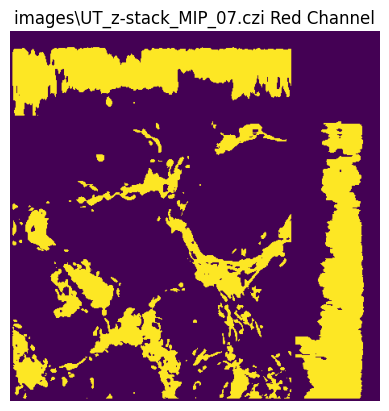

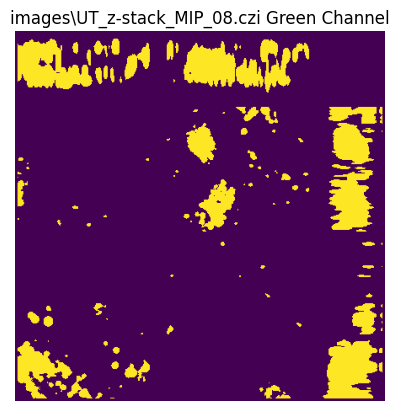

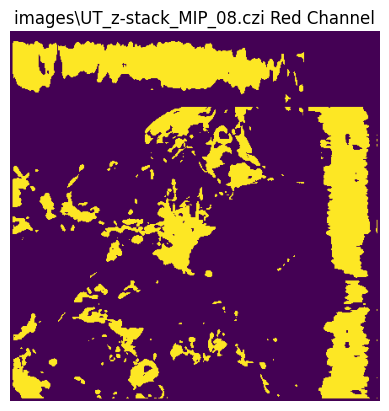

In [154]:
def main(image_folder):

    images_to_analyze = extract_image_paths(image_folder)

    for path in images_to_analyze:
        image = read_image(path)
        image_squeezed = np.squeeze(image) 
        green, red = extract_channels(image_squeezed)
        otsu_thresholded_green = otsu_threshold(green)
        otsu_thresholded_red = otsu_threshold(red)
        display_image(otsu_thresholded_green, path, "Green Channel")
        display_image(otsu_thresholded_red, path, "Red Channel")

    



        
if __name__ == "__main__":
    image_folder = 'images'
    main(image_folder)